In [ ]:
#https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [1]:
path= "/Users/KumarSanjeev/Desktop/Training Data/consumer_complaints.csv"
#path= "/Users/KumarSanjeev/Desktop/Training Data/tmdb_5000_movies.csv"

In [19]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv(path)

/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# p_test = pd.read_csv('TrainSA.csv')
# p_test.SentimentText=p_test.SentimentText.astype(str)
df1=df.astype(str)

In [24]:
df1.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",nan,nan,nan,U.S. Bancorp,CA,95993,nan,nan,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",nan,nan,nan,Wells Fargo & Company,CA,91104,nan,nan,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,nan,Incorrect information on credit report,Account status,nan,nan,Wells Fargo & Company,NY,11764,nan,nan,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,nan,nan,"Navient Solutions, Inc.",MD,21402,nan,nan,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,nan,nan,Resurgent Capital Services L.P.,GA,30106,nan,nan,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [25]:
df1.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [26]:
df1["product"].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [27]:
from io import StringIO
col = ['product', 'consumer_complaint_narrative']
df1 = df1[col]
df1.head()

,product,consumer_complaint_narrative
0,Mortgage,nan
1,Mortgage,nan
2,Credit reporting,nan
3,Student loan,nan
4,Debt collection,nan


In [28]:
df1.columns = ['product', 'consumer_complaint_narrative']
df1['category_id'] = df1['product'].factorize()[0]
category_id_df = df1[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)
df1.head()


,product,consumer_complaint_narrative,category_id
0,Mortgage,nan,0
1,Mortgage,nan,0
2,Credit reporting,nan,1
3,Student loan,nan,2
4,Debt collection,nan,3


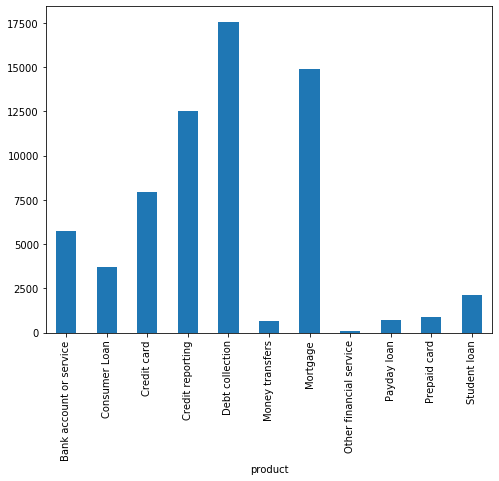

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [29]:
print('Number of missing comments in comment text:')
df1['consumer_complaint_narrative'].isnull().sum()

Number of missing comments in comment text:


0

In [31]:
df1['consumer_complaint_narrative'][40]

'nan'

In [32]:
categories = ['Mortgage', 'Debt collection', 'Credit reporting', 'Credit card', 'Bank account or service', 'Consumer Loan',"Student loan","Payday loan","Money transfers","Prepaid card","Other financial service"]

In [33]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [35]:
import re
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].map(lambda com : clean_text(com))

In [36]:
df1['consumer_complaint_narrative']

0         nan
1         nan
2         nan
3         nan
4         nan
         ... 
555952    nan
555953    nan
555954    nan
555955    nan
555956    nan
Name: consumer_complaint_narrative, Length: 555957, dtype: object

In [40]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [50]:
X=df1["consumer_complaint_narrative"]
y=df1["product"]

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
train, test = train_test_split(df1, random_state=42, test_size=0.33, shuffle=True)

In [52]:
# X_train = train.consumer_complaint_narrative
# X_test = test.consumer_complaint_narrative
print(X_train.shape)
print(X_test.shape)

(472563,)
(83394,)


In [55]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)

In [56]:
X_train

<472563x49720 sparse matrix of type '<class 'numpy.float64'>'
	with 5577380 stored elements in Compressed Sparse Row format>

In [57]:
X_test=vectorizer.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
y_pred=model.predict(X_test)

In [63]:
score= accuracy_score(y_pred,y_test)

In [64]:
score

0.40796700002398256

In [70]:
model1=clf=OneVsRestClassifier(MultinomialNB())
model1.fit(X_train,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=None)

In [71]:
y_pred=model1.predict(X_test)

In [72]:
score= accuracy_score(y_pred,y_test)
score

0.38824136028970907